In [4]:
import pandas as pd
from data_cleaning.data_utils import *

In [5]:
names_data = pd.read_csv('names_gpw.csv')

# FULL DF CLEARNING

In [6]:
full_data = pd.read_csv("dataframe_gpw.csv")

In [7]:
data_gpw = pd.merge(full_data, names_data, on='filename')

In [8]:
data_gpw = data_gpw.sort_values(by=['filename', 'End of period'])

In [9]:
data_gpw.columns = clean_column_names(data_gpw.columns)

In [10]:
count_rows_by_filename(data_gpw)

,filename,count
0,11BIT.xlsx,49
1,3LPSA.xlsx,6
2,3RGAMES.xlsx,48
3,AB.xlsx,70
4,AC.xlsx,51
...,...,...
332,ZPUE.xlsx,95
333,ZREMBCH.xlsx,65
334,ZUE.xlsx,53
335,ZUK.xlsx,67


In [11]:
# Delete all companies under 4 because its not enough to cover any change in assets or liabilities
filenames_to_remove = [
    'SADOVAYA.xlsx',
    'BMW.xlsx',
    'KERNEL.xlsx',
    'SILVANO.xlsx',
    'IMCSA.xlsx',
    'STSHOLDING.xlsx'
]

df_filtered = data_gpw[~data_gpw['filename'].isin(filenames_to_remove)]

# Missing data

In [12]:
data_gpw.isnull().sum()

end_of_period                                                      0
revenues_from_sales                                              945
operating_profitloss                                             737
net_profitloss_attributable_to_equity_holders_of_the_parent      577
total_comprehensive_income_attributable_to_equity_holders      17723
                                                               ...  
noncurrent_financial_liabilities                               19906
financial_liabilities                                          19906
company_name                                                       0
sector                                                            13
ticker                                                             0
Length: 109, dtype: int64

In [13]:
# Sektor NaN
rows_with_nan_in_sektor = data_gpw[data_gpw['sector'].isna()]
rows_with_nan_in_sektor

,end_of_period,revenues_from_sales,operating_profitloss,net_profitloss_attributable_to_equity_holders_of_the_parent,total_comprehensive_income_attributable_to_equity_holders,depreciation,cash_flow_from_operating_activities,cash_flow_from_investing_activities,cash_flow_from_financing_activities,aktywa,...,rate_debt_security,leverage,asset_utilization,load_gross_profit,current_financial_liabilities,noncurrent_financial_liabilities,financial_liabilities,company_name,sector,ticker
49,2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.301800e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3LP SA,NaN,3LP_IPO
50,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.053760e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3LP SA,NaN,3LP_IPO
51,2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.613490e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3LP SA,NaN,3LP_IPO
52,2020-12-31,34515.00000,3929.00000,138.00000,138.0,4114.00000,8513.00000,-3261.00000,-5264.0000,1.640630e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3LP SA,NaN,3LP_IPO
53,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.547040e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3LP SA,NaN,3LP_IPO
54,2021-12-31,39704.00000,3898.00000,2169.00000,2169.0,4459.00000,5831.00000,-2718.00000,-3195.0000,1.571200e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3LP SA,NaN,3LP_IPO
2522,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.166580e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BMW AG,NaN,BMW
2523,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.295270e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BMW AG,NaN,BMW
18362,2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.065330e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uf Games SA,NaN,UFG_IPO
18363,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.348397e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uf Games SA,NaN,UFG_IPO


## Notes
Manually checking for each company

3LP SA - handel
BMW AG - motoryzacja
Uf Games SA - gry


In [14]:
company_to_sector = {
    '3LP SA': 'handel',
    'BMW AG': 'motoryzacja',
    'Uf Games SA': 'gry'
}

data_gpw['sector'] = data_gpw.apply(lambda row: company_to_sector[row['company_name']] if pd.isna(row['sector']) else row['sector'], axis=1)

In [15]:
# Rest of financial data - fill NaN with 0 (=no change)
data_gpw = data_gpw.fillna(0)

In [16]:
data_gpw.columns.tolist()

['end_of_period',
 'revenues_from_sales',
 'operating_profitloss',
 'net_profitloss_attributable_to_equity_holders_of_the_parent',
 'total_comprehensive_income_attributable_to_equity_holders',
 'depreciation',
 'cash_flow_from_operating_activities',
 'cash_flow_from_investing_activities',
 'cash_flow_from_financing_activities',
 'aktywa',
 'noncurrent_assets',
 'current_assets',
 'equity_shareholders_of_the_parent',
 'noncurrent_liabilities',
 'current_liabilities',
 'number_of_shares',
 'earnings_per_share',
 'total_comprehensive_income_per_share',
 'book_value_per_share',
 'accounting_standard',
 'filename',
 'property_plant_and_equipment',
 'exploration_for_and_evaluation_of_mineral_resources',
 'intangible_assets',
 'goodwill',
 'investment_property',
 'rightofuse_assets',
 'investment_in_affiliates',
 'noncurrent_financial_assets',
 'noncurrent_loans_and_receivables',
 'deferred_income_tax',
 'noncurrent_deferred_charges_and_accruals',
 'noncurrent_derivative_instruments',
 'other

## Change each indicator to % value
return_on_equity
return_on_assets
leverage
asset_utilization
debt_ratio
debt_service_ratio
rate_debt_security
working_capital_ratio

In [17]:
columns_to_convert = [
    'return_on_equity',
    'return_on_assets',
    'leverage',
    'asset_utilization',
    'debt_ratio',
    'debt_service_ratio',
    'rate_debt_security',
    'working_capital_ratio'
]

data_gpw[columns_to_convert] = data_gpw[columns_to_convert] / 100

In [18]:
column_mapping = {
    'financial_liabilities': 'total_liability',
    'aktywa': 'total_assets'
}

data_gpw = data_gpw.rename(columns=column_mapping)

In [19]:
data_gpw

,end_of_period,revenues_from_sales,operating_profitloss,net_profitloss_attributable_to_equity_holders_of_the_parent,total_comprehensive_income_attributable_to_equity_holders,depreciation,cash_flow_from_operating_activities,cash_flow_from_investing_activities,cash_flow_from_financing_activities,total_assets,...,rate_debt_security,leverage,asset_utilization,load_gross_profit,current_financial_liabilities,noncurrent_financial_liabilities,total_liability,company_name,sector,ticker
0,2010-03-31,66.0,0.0,-16.0,0.0,29.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11 bit studios SA,gry,11B
1,2010-09-30,129.0,0.0,-26.0,0.0,6.0,0.0,0.0,0.0,1411.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11 bit studios SA,gry,11B
2,2010-12-31,228.0,0.0,-198.0,0.0,0.0,0.0,0.0,0.0,1352.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11 bit studios SA,gry,11B
3,2011-03-31,144.0,0.0,-50.0,0.0,0.0,0.0,0.0,0.0,1342.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11 bit studios SA,gry,11B
4,2011-06-30,959.0,0.0,377.0,0.0,7.0,0.0,0.0,0.0,1659.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11 bit studios SA,gry,11B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19901,2021-09-30,995385.0,103668.0,104744.0,106250.0,36985.0,354390.0,-22037.0,-433167.0,2649304.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Grupa Żywiec SA,napoje,ZWC
19902,2021-12-31,733974.0,46890.0,32175.0,42434.0,42311.0,50929.0,-65863.0,30091.0,2508447.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Grupa Żywiec SA,napoje,ZWC
19903,2022-03-31,696778.0,6649.0,-1246.0,41367.0,38391.0,13967.0,-33280.0,57099.0,2741947.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Grupa Żywiec SA,napoje,ZWC
19904,2022-06-30,1209418.0,101579.0,92625.0,45386.0,39932.0,101877.0,-21179.0,-81990.0,2981239.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Grupa Żywiec SA,napoje,ZWC


## Adding 'target' column from Stooq data

In [20]:
target_data = pd.read_csv("stooq_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'dataframes/stooq_data.csv'

In [21]:
target_data

NameError: name 'target_data' is not defined

In [22]:
target_data.columns.tolist()

NameError: name 'target_data' is not defined

In [164]:
target_data['avg_share_price'] = target_data[['OPEN', 'HIGH', 'LOW', 'CLOSE']].mean(axis=1)
target_data.rename(columns={'TICKER': 'ticker', 'DATE': 'end_of_period'}, inplace=True)

merged_df = pd.merge(data_gpw, target_data[['ticker', 'end_of_period', 'avg_share_price']], on=['ticker', 'end_of_period'], how='left')

In [165]:
merged_df

,end_of_period,revenues_from_sales,operating_profitloss,net_profitloss_attributable_to_equity_holders_of_the_parent,total_comprehensive_income_attributable_to_equity_holders,depreciation,cash_flow_from_operating_activities,cash_flow_from_investing_activities,cash_flow_from_financing_activities,total_assets,...,leverage,asset_utilization,load_gross_profit,current_financial_liabilities,noncurrent_financial_liabilities,total_liability,company_name,sector,ticker,avg_share_price
0,2010-03-31,66.0,0.0,-16.0,0.0,29.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,11 bit studios SA,gry,11B,NaN
1,2010-09-30,129.0,0.0,-26.0,0.0,6.0,0.0,0.0,0.0,1411.00,...,0.0,0.0,0.0,0.0,0.0,0.0,11 bit studios SA,gry,11B,NaN
2,2010-12-31,228.0,0.0,-198.0,0.0,0.0,0.0,0.0,0.0,1352.36,...,0.0,0.0,0.0,0.0,0.0,0.0,11 bit studios SA,gry,11B,7.5950
3,2010-12-31,228.0,0.0,-198.0,0.0,0.0,0.0,0.0,0.0,1352.36,...,0.0,0.0,0.0,0.0,0.0,0.0,11 bit studios SA,gry,11B,7.5950
4,2011-03-31,144.0,0.0,-50.0,0.0,0.0,0.0,0.0,0.0,1342.00,...,0.0,0.0,0.0,0.0,0.0,0.0,11 bit studios SA,gry,11B,22.3875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29084,2022-03-31,696778.0,6649.0,-1246.0,41367.0,38391.0,13967.0,-33280.0,57099.0,2741947.00,...,0.0,0.0,0.0,0.0,0.0,0.0,Grupa Żywiec SA,napoje,ZWC,509.0000
29085,2022-06-30,1209418.0,101579.0,92625.0,45386.0,39932.0,101877.0,-21179.0,-81990.0,2981239.00,...,0.0,0.0,0.0,0.0,0.0,0.0,Grupa Żywiec SA,napoje,ZWC,490.7500
29086,2022-06-30,1209418.0,101579.0,92625.0,45386.0,39932.0,101877.0,-21179.0,-81990.0,2981239.00,...,0.0,0.0,0.0,0.0,0.0,0.0,Grupa Żywiec SA,napoje,ZWC,490.7500
29087,2022-09-30,1106635.0,61538.0,23844.0,18814.0,40212.0,156461.0,-24386.0,-117588.0,2733389.00,...,0.0,0.0,0.0,0.0,0.0,0.0,Grupa Żywiec SA,napoje,ZWC,475.5000


In [166]:
merged_df.isnull().sum()

end_of_period                                                      0
revenues_from_sales                                                0
operating_profitloss                                               0
net_profitloss_attributable_to_equity_holders_of_the_parent        0
total_comprehensive_income_attributable_to_equity_holders          0
                                                               ...  
total_liability                                                    0
company_name                                                       0
sector                                                             0
ticker                                                             0
avg_share_price                                                10723
Length: 110, dtype: int64

In [ ]:
merged_df = merged_df.dropna(subset=['avg_share_price'])
merged_df['target'] = merged_df['avg_share_price'] * merged_df['number_of_shares']


data_with_target = merged_df.round(2)

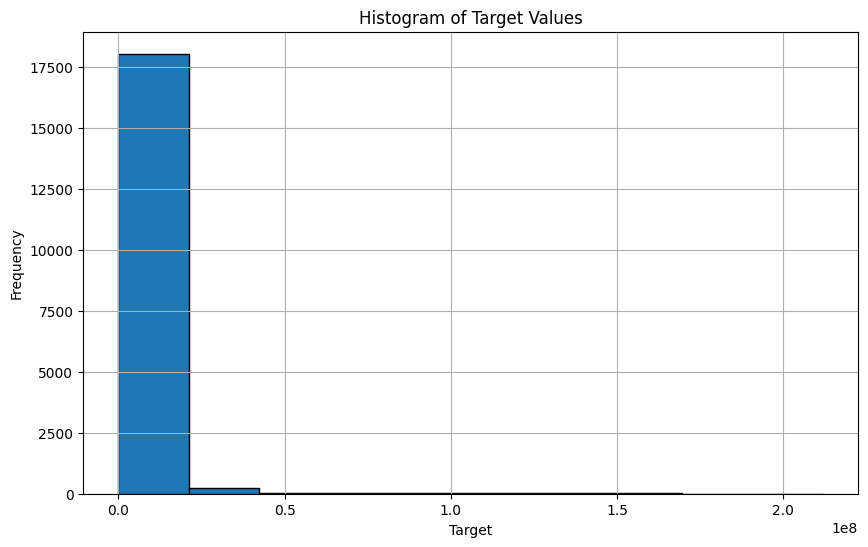

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data_with_target['target'], bins=10, edgecolor='black')
plt.title('Histogram of Target Values')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [169]:
data_with_target = data_with_target[data_with_target['target'] != 0]

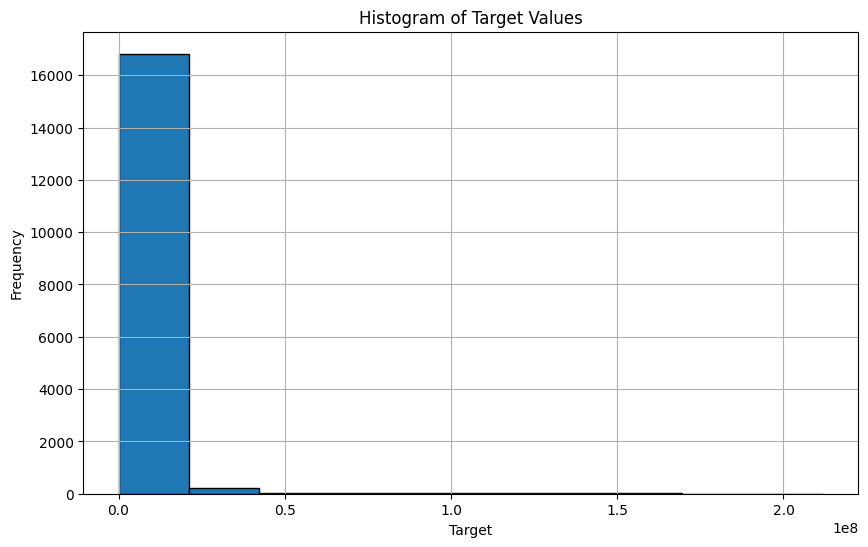

In [170]:
plt.figure(figsize=(10, 6))
plt.hist(data_with_target['target'], bins=10, edgecolor='black')
plt.title('Histogram of Target Values')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [171]:
data_with_target

,end_of_period,revenues_from_sales,operating_profitloss,net_profitloss_attributable_to_equity_holders_of_the_parent,total_comprehensive_income_attributable_to_equity_holders,depreciation,cash_flow_from_operating_activities,cash_flow_from_investing_activities,cash_flow_from_financing_activities,total_assets,...,asset_utilization,load_gross_profit,current_financial_liabilities,noncurrent_financial_liabilities,total_liability,company_name,sector,ticker,avg_share_price,target
2,2010-12-31,228.0,0.0,-198.0,0.0,0.0,0.0,0.0,0.0,1352.36,...,0.0,0.0,0.0,0.0,0.0,11 bit studios SA,gry,11B,7.59,14208.43
3,2010-12-31,228.0,0.0,-198.0,0.0,0.0,0.0,0.0,0.0,1352.36,...,0.0,0.0,0.0,0.0,0.0,11 bit studios SA,gry,11B,7.59,14208.43
4,2011-03-31,144.0,0.0,-50.0,0.0,0.0,0.0,0.0,0.0,1342.00,...,0.0,0.0,0.0,0.0,0.0,11 bit studios SA,gry,11B,22.39,41881.66
5,2011-03-31,144.0,0.0,-50.0,0.0,0.0,0.0,0.0,0.0,1342.00,...,0.0,0.0,0.0,0.0,0.0,11 bit studios SA,gry,11B,22.39,41881.66
6,2011-06-30,959.0,0.0,377.0,0.0,7.0,0.0,0.0,0.0,1659.00,...,0.0,0.0,0.0,0.0,0.0,11 bit studios SA,gry,11B,14.28,26705.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29084,2022-03-31,696778.0,6649.0,-1246.0,41367.0,38391.0,13967.0,-33280.0,57099.0,2741947.00,...,0.0,0.0,0.0,0.0,0.0,Grupa Żywiec SA,napoje,ZWC,509.00,5228110.53
29085,2022-06-30,1209418.0,101579.0,92625.0,45386.0,39932.0,101877.0,-21179.0,-81990.0,2981239.00,...,0.0,0.0,0.0,0.0,0.0,Grupa Żywiec SA,napoje,ZWC,490.75,5040658.63
29086,2022-06-30,1209418.0,101579.0,92625.0,45386.0,39932.0,101877.0,-21179.0,-81990.0,2981239.00,...,0.0,0.0,0.0,0.0,0.0,Grupa Żywiec SA,napoje,ZWC,490.75,5040658.63
29087,2022-09-30,1106635.0,61538.0,23844.0,18814.0,40212.0,156461.0,-24386.0,-117588.0,2733389.00,...,0.0,0.0,0.0,0.0,0.0,Grupa Żywiec SA,napoje,ZWC,475.50,4884020.74


In [172]:
data_with_target.to_csv('data_with_target.csv', index=False)